# Evaluación de las variables

En este documento realizamos una evaluación de la correlación de las variables obtenidas anteriormente para seleccionar aquellas variables con mayor correlación con la variable objetivo.

In [1]:
# Carga inicial de librerías
import pandas as pd
import numpy as np
from datetime import datetime
from statistics import mean
import matplotlib.pyplot as plt

In [2]:
# Métodos útiles para el análisis
def visualizar_correlacion(corr, objetivo, tit_variables):
    '''Método que realiza la visualización de las correlaciones con la variable objetivo
    
    Args:
        corr(Series): Correlaciones obtenidas con la variable objetivo
        objetivo(str): Nombre de la variable objetivo
        tit_variables(str): Título de las variables para mostrar en el eje x del gráfico
    '''
    plt.figure(figsize=(10, 6))
    corr.plot(kind='bar', color='skyblue')
    plt.title('Correlación de las variables con la variable objetivo ' + objetivo)
    plt.xlabel(tit_variables)
    plt.ylabel('Coeficientes de Correlación')
    plt.xticks(rotation=80)
    plt.gca().set_facecolor('lightgrey')
    plt.grid(True, linestyle='--', linewidth=0.5, color='white')
    plt.show()

# Disminución de la dimensionalidad

Realizamos una disminución de variables del conjunto de datos mediante un estudio de la correlación de las diferentes variables con la variable objetivo que en nuestro caso es la variable de numero_casos

In [3]:
# Cargamos los datos de las estaciones de cada una de las islas
datos = pd.read_csv('../data/Final/datos_final.csv', header=0)

In [4]:
# Variable objetivo
objetivo = 'numero_casos'

# Obtenemos los nombres de todas las variables
columnas = datos.columns

# Columnas a no tener en cuenta para el análisis de la correlación
columnas_eliminar = ['isla', 'fecha']

variables = [columna for columna in columnas if columna not in columnas_eliminar]

In [5]:
variables_atm = ['numero_casos','tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'sol', 'presMax', 'presMin', 'hrMedia', 'hrMax', 'hrMin']
variables_covid = ['numero_casos','ia_7dias','ia_14dias','pcr_total','pcr_positivos','pcr_porcentaje_positivos','pcr_porcentaje_positivos_7dias','Urg_ingr','Urg_cv','HPT_cv19','HPT_nocv19','CCR_cv19','CCR_nocv19','CSR_cv19','CSR_nocv19']


datos_covid = datos[variables_covid]
datos_atm = datos[variables_atm]

Obtenemos los coeficientes de correlación.

In [6]:
# Correlación de todas las variables
datos_corr = datos[variables]
correlacion = datos_corr.corrwith(datos_corr[objetivo])


# Correlación con las variables de pandemia
datos_corr_covid = datos_covid
correlacion_covid = datos_corr_covid.corrwith(datos_covid[objetivo])

# Correlación con las variables atmosféricas
datos_corr_atm = datos_atm
correlacion_atm = datos_corr_atm.corrwith(datos_atm[objetivo])

Visualizamos la correlación de todas las variables

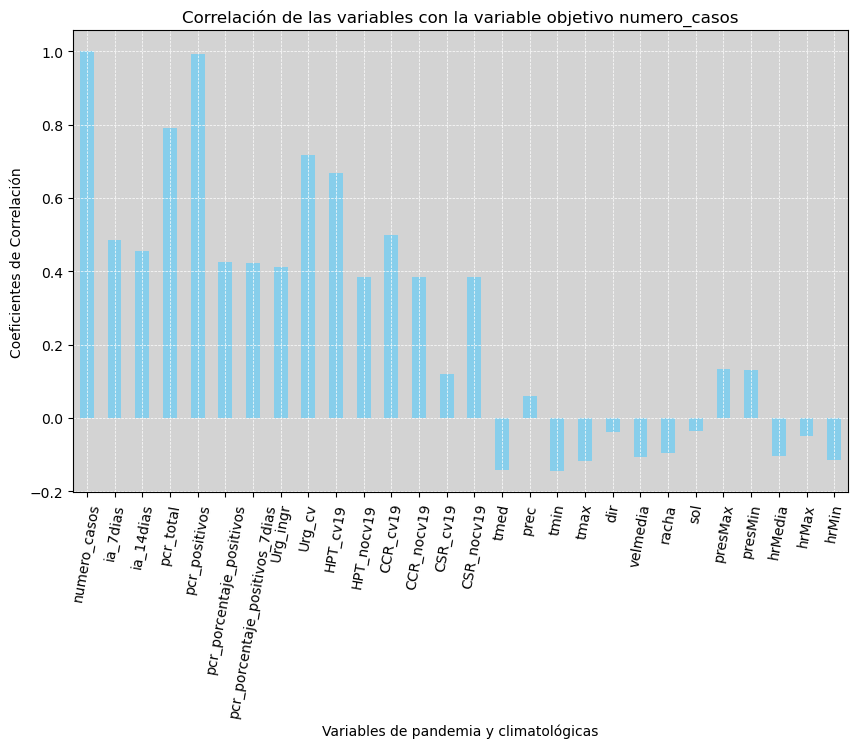

In [7]:
visualizar_correlacion(correlacion, objetivo, 'Variables de pandemia y climatológicas')

Visualizamos la correlación de las variables pandémicas

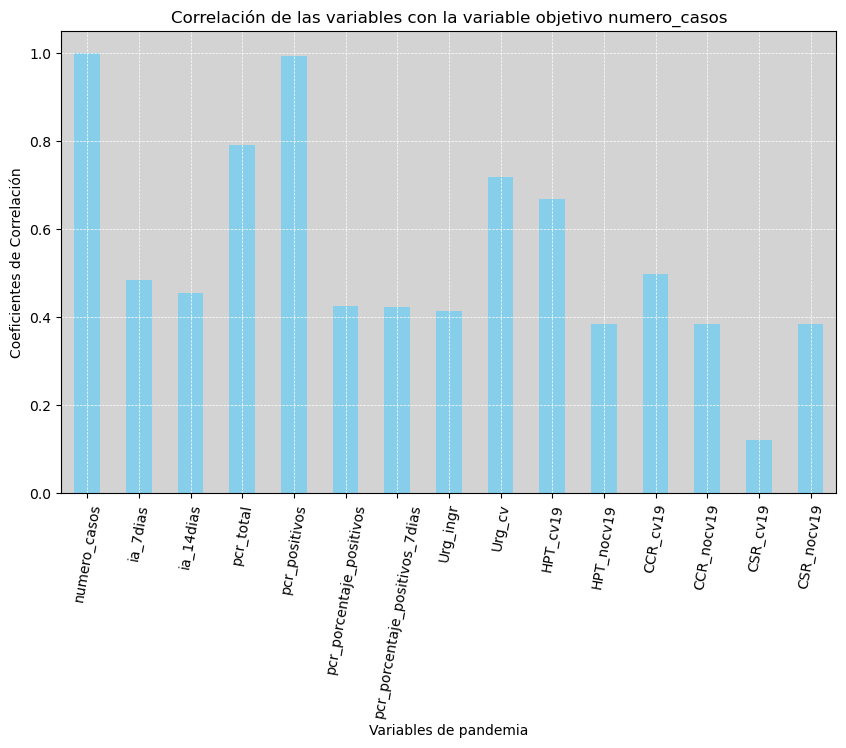

In [8]:
visualizar_correlacion(correlacion_covid, objetivo, 'Variables de pandemia')

Visualizamos la correlación de las variables atmosféricas.

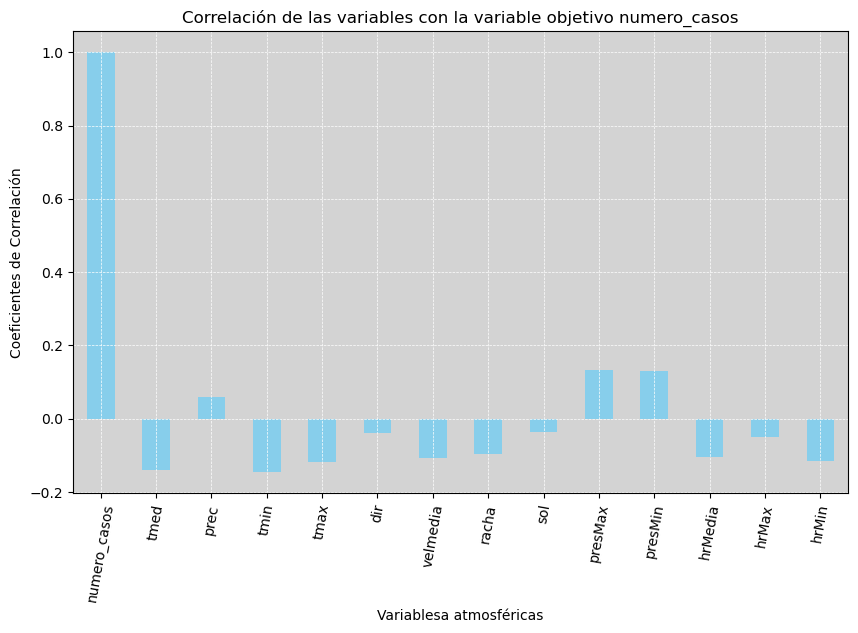

In [9]:
visualizar_correlacion(correlacion_atm, objetivo, 'Variablesa atmosféricas')

In [10]:
correlacion_or = correlacion.sort_values(ascending=False)

Visualizamos los coeficientes de correlación de cad variable

In [11]:
correlacion_or

numero_casos                      1.000000
pcr_positivos                     0.993662
pcr_total                         0.789697
Urg_cv                            0.718099
HPT_cv19                          0.667196
CCR_cv19                          0.497933
ia_7dias                          0.484332
ia_14dias                         0.454211
pcr_porcentaje_positivos          0.424486
pcr_porcentaje_positivos_7dias    0.423618
Urg_ingr                          0.412849
HPT_nocv19                        0.384556
CCR_nocv19                        0.384533
CSR_nocv19                        0.384276
presMax                           0.134259
presMin                           0.131297
CSR_cv19                          0.120186
prec                              0.059845
sol                              -0.036707
dir                              -0.038097
hrMax                            -0.050722
racha                            -0.095133
hrMedia                          -0.103394
velmedia   

In [12]:
for variable, puntuacion in correlacion_or.items():
    print("Correlación entre los atributos ", objetivo, "-", variable, ":", puntuacion)

Correlación entre los atributos  numero_casos - numero_casos : 1.0
Correlación entre los atributos  numero_casos - pcr_positivos : 0.9936619123847807
Correlación entre los atributos  numero_casos - pcr_total : 0.7896968656496851
Correlación entre los atributos  numero_casos - Urg_cv : 0.7180989974238654
Correlación entre los atributos  numero_casos - HPT_cv19 : 0.667195772798363
Correlación entre los atributos  numero_casos - CCR_cv19 : 0.49793277144471004
Correlación entre los atributos  numero_casos - ia_7dias : 0.48433197333767447
Correlación entre los atributos  numero_casos - ia_14dias : 0.454211346947406
Correlación entre los atributos  numero_casos - pcr_porcentaje_positivos : 0.42448626080057605
Correlación entre los atributos  numero_casos - pcr_porcentaje_positivos_7dias : 0.4236178070749593
Correlación entre los atributos  numero_casos - Urg_ingr : 0.41284868784770773
Correlación entre los atributos  numero_casos - HPT_nocv19 : 0.3845561061884945
Correlación entre los atribu

Podemos observar que de entre las variables observadas, las variables atmosféricas apenas tienen peso en la correlación con la variable objetivo y para la mayoría de variables su correlación es negativa por lo que mientras estas disminuyen su valor la variable objetivo aumenta, lo que podría estar relacionado con lo visto en la literatura respecto a las variables de temperatura donde se veía que las temperaturas bajas provocaban que hubiera un mayor número de casos de COVID.

Respecto de las variables de pandemia podemos  ver que hay una fuerte relación con el número de PCR positivas lo que equivale al número de casos por lo que se obviará para este análisis, sin embargo podemos ver una fuerte correlación entre el número de PCR totales realizadas, el número de pacientes que ingresan en el servicio de Urgencias por COVID así como el número de camas de hospital, que no son de unidades críticas, ocupadas por pacientes COVID.

Por todo esto se seleccionana para el estudio las variables 'pcr_total', 'Urg_cv', 'HPT_cv19', 'CCR_cv19', 'ia_7dias' respecto a las variables de la pandemia y las variables 'tmin', 'tmed', 'presMax' respecto de las variables atmosféricas.

In [13]:
variables_finales = ['fecha', 'isla', 'numero_casos','pcr_total', 'Urg_cv', 'HPT_cv19', 'CCR_cv19', 'tmin', 'tmed', 'presMax']

ruta_fichero = "../data/Final/" 
nombre_fichero = "datos_reduc_final.csv"




df_final_reduc = datos[variables_finales]

# Escribimos los datos en fichero
df_final_reduc.to_csv(ruta_fichero + nombre_fichero, index=False)